### Упражнение 1

* Реализуйте функцию `plot_horizontal_bar`, рисующую горизонтальные bar'ы

In [1]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import pandas as pd
import datetime
import locale
locale.setlocale(locale.LC_ALL, "ru")

'ru'

In [2]:
def plot_horizontal_bar(bars_length, labels, yticks_labels, figsize):
    plt.figure(figsize=figsize)
    ind = np.arange(len(bars_length))
    p1 = plt.barh(ind,bars_length, alpha=0.5, height=0.8)
    plt.yticks(ind, yticks_labels, fontsize=20)
    plt.xticks(fontsize=20)
    for i in ind:
        plt.annotate(labels[i], xy=(0,0), xytext=(max(p1[i].get_width() ,0), p1[i].get_y()+p1[i].get_height()/2),  ha='left' , size=20, va='center')
    plt.grid(True)
    plt.show()

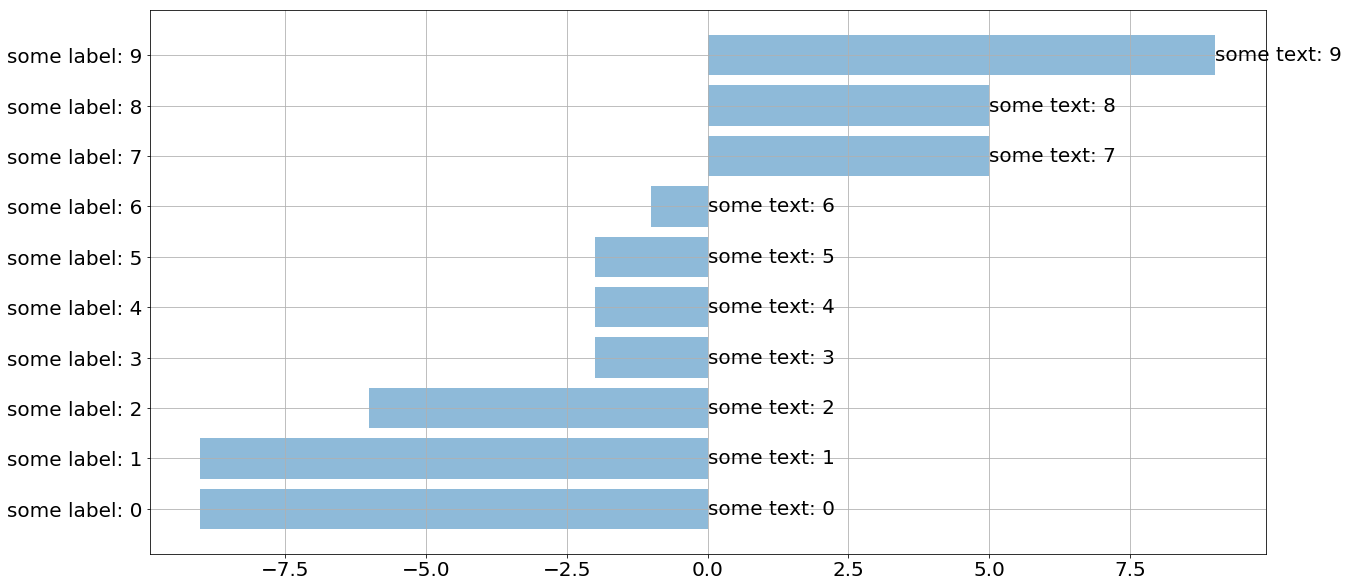

In [3]:
# Сигнатура функции и пример вывода:

bars_length = np.random.randint(-10, 10, 10)
bars_length.sort()

yticks_labels = ['some label: {}'.format(i) for i in range(10)]
labels = ['some text: {}'.format(i) for i in range(10)]
figsize = (20, 10)
plt.figure(figsize=(20, 10))

plot_horizontal_bar(bars_length, labels, yticks_labels, figsize)

### Упражнение 2

* Реализуйте функцию `plot_time_probabilities`, рисующую изменяющиеся во времени вероятности неких событий.
* Cобытия для нас имеют тональность (от плохого к хорошему). Отразите ее на графике с помощью градиента по цвету.

In [4]:
from matplotlib import rcParams, cycler
def plot_time_probabilities(probabilities_in_time, figsize):
    plt.figure(figsize=figsize)
    ts_prev = 0 * probabilities_in_time[0]
    cmap = plt.cm.coolwarm
    rcParams['axes.prop_cycle'] = cycler(color=cmap(np.linspace(0, 1, probabilities_in_time.shape[1])))
    for col in probabilities_in_time.columns:
        ts = probabilities_in_time[col] + ts_prev
        plt.plot(ts, label=str('Probability: '+ str(col)))
        plt.fill_between(ts.index, ts, ts_prev, cmap=cmap)
        ts_prev = ts
    leg = plt.legend(loc='lower left' , prop={'size': 14})
    leg_lines = leg.get_lines()
    plt.setp(leg_lines, linewidth=14)
    plt.yticks(fontsize=14)
    plt.xticks(fontsize=14)
    plt.show()

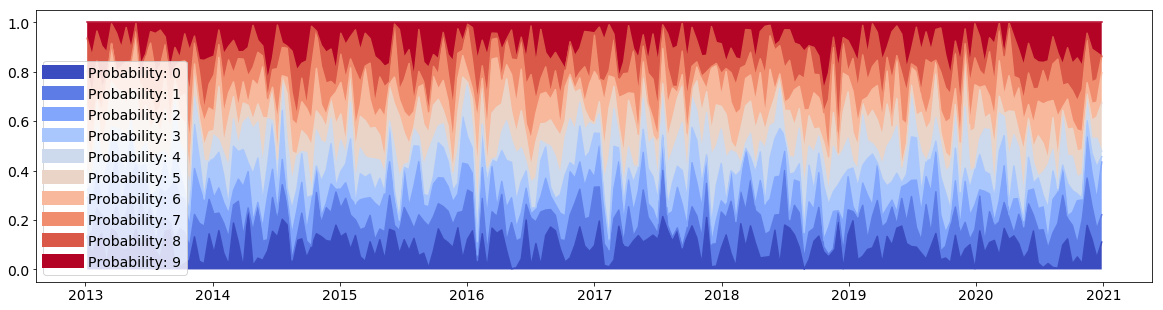

In [5]:
# Сигнатура функции и пример вывода:

dti = pd.date_range('2013-01-01', '2020-12-31', freq='2W')
probabilities_in_time = np.random.random((10, len(dti)))
probabilities_in_time = probabilities_in_time / probabilities_in_time.sum(axis=0)
probabilities_in_time = pd.DataFrame(probabilities_in_time).T
probabilities_in_time.index = dti
figsize = (20, 5)
plot_time_probabilities(probabilities_in_time, figsize)

### Упражнение 3
 
* Реализуйте функцию `plot_intraday_ts`, рисующую тепловую карту по временному ряду с внутридневными данными

In [6]:
def plot_intraday_ts(intraday_ts, figsize):
    intraday_ts = intraday_ts.drop(intraday_ts.index[-1])
    df = pd.DataFrame({'timestamp': intraday_ts.index, 'data' : intraday_ts})
    df['time'] = [i.time() for i in df['timestamp']]
    df['date'] = [i.date() for i in df['timestamp']]
    pt = df.fillna(df.mean()).pivot_table(index = ['time'], columns = 'date', values = 'data', aggfunc = np.mean)
    d = [i.strftime("%B %d") for i in pt.columns]
    t = [i.strftime("%H:%M") for i in pt.index]
    fig = plt.figure(figsize=figsize)
    сs = plt.pcolor(pt, cmap = 'RdBu_r', edgecolors='white', linewidths=1) 
    plt.yticks(range(1,len(t),2),t[1::2], fontsize=10)
    plt.tick_params(axis='y',labelleft=False,labelright=True, left = False, right = True)
    plt.xticks(range(1,len(d),2),d[1::2], fontsize=8, rotation=40)
    plt.ylabel('Время', fontsize=16)
    plt.xlabel('Дата', fontsize=16)
    cbaxes = fig.add_axes([0.09, 0.1, 0.01, 0.8])
    cbar = fig.colorbar(сs, cax = cbaxes)
    plt.show()

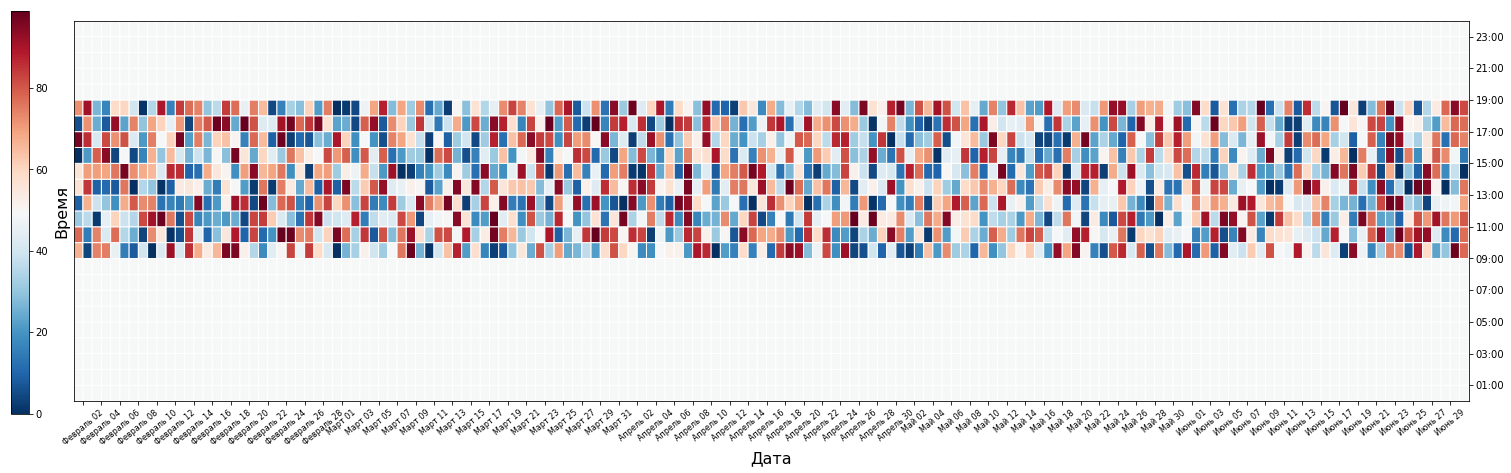

In [7]:
# Сигнатура функции и пример вывода:

intraday_ts = pd.Series(np.random.randint(0, 100, 3625), 
                        index=pd.date_range('2020-02-01', '2020-07-01', freq='H'))
intraday_ts.loc[(intraday_ts.index.hour < 9) | (intraday_ts.index.hour > 18)] = np.nan
figsize = (25, 7)



plot_intraday_ts(intraday_ts, figsize)